In [1]:
'''
4-1 is deleted because it is the file from the previous version
In this file we calculate the similarity between past and future conetext measures to develop two subsets.
You don't need to use this because the subsets have already been there in your download material.
We just show the code here to let you know our process.
'''
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("data/irish-dis-measure-vae-test-whole.npy", allow_pickle = True)

In [4]:
def similarity(a, b):
    s = len(a)
    max_acc = 0.0
    num_pitch = np.sum(a < 128)
    for i in range(s):
        temp = np.concatenate((a[i:],a[:i]))
#         acc = np.sum(temp == b) / s
        acc = np.sum(np.logical_and(temp == b,  temp < 128)) / num_pitch
        max_acc = max(acc, max_acc)
    return max_acc


In [ ]:
acc = []
for i,d in enumerate(data):
    d = d[:,0]
    a = np.concatenate((d[:6]))
    b = np.concatenate((d[10:]))
    acc.append([i,similarity(a,b)])
    if i % 100 == 0:
        print("process:",i)

In [7]:
acc.sort(key = lambda x:x[1])
acc = np.array(acc)

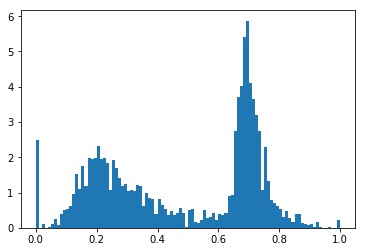

In [8]:
acc_sim = acc[:,1]
acc_sim
# similarity distribution
num_bins = 100
fig, ax = plt.subplots()
n, bins, patches = ax.hist(acc_sim, num_bins, density = 1)
# ax.plot(bins)
plt.show()

In [9]:
# pick another topK if you want to get the repetition dataset
new_data = data[acc[:200,0].astype(int),:,:]
np.save("irish-dis-measure-vae-validate-non-repetition.npy", new_data)